## Olympic Medal and Emerging Athlete Pedictor

The Olympic Games is the world’s top sports competition, with 206 nations and over 14,000 athletes taking part in various summer and winter sports.​ Olympic outcomes can be very unpredictable where it can be difficult to predict future medalists. We created an accuracte predictive model that can help athletes, coaches, and sports organizations properly identify current stars while also developing future talent. Likewise, competitive athletes and amateurs alike are interested in predicting wins and potential break-out athletes that could be their fierest competitiers. 

In [20]:

# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Data Preprocessing and EDA
We load in our data to prepare the dataset for further analysis by handling missing values, converting categorical variables, and creating additional features for predicitve modeling. We also provide initial insights into the dataset's characteristics and structure through descriptive statistics and sample data. 

In [28]:
# Load in dataset
athlete_events = pd.read_csv('athlete_events.csv')

# Calculate median values for each column
age_median = athlete_events['Age'].mean()
height_median = athlete_events['Height'].mean()
weight_median = athlete_events['Weight'].mean()

# Fill missing values with median values
athlete_events['Age'] = athlete_events['Age'].fillna(age_median)
athlete_events['Height'] = athlete_events['Height'].fillna(height_median)
athlete_events['Weight'] = athlete_events['Weight'].fillna(weight_median)

# Convert categorical columns to numeric
athlete_events['Sex'] = athlete_events['Sex'].map({'F': 1, 'M': 0}).astype(int)
athlete_events['Season'] = athlete_events['Season'].map({'Summer': 0, 'Winter': 1}).astype(int)

# Add new columns to predict future winners and break out athletes
athlete_events['won_medal'] = athlete_events['Medal'].notnull().astype(int)
athlete_events['participated_before'] = athlete_events.duplicated(subset=['Name'], keep=False)
athlete_events['won_medal_before'] = athlete_events.groupby('Name')['won_medal'].transform('max')
athlete_events['breakout_candidate'] = ((athlete_events['participated_before'] == True) & (athlete_events['won_medal_before'] == 0)).astype(int)

# Describe the dataset
print("\nDescription of the dataset:")
print(athlete_events.describe())

# Show the shape of the dataset
print("\nShape of the dataset:")
print(athlete_events.shape)

# Show the first 5 rows of the dataset
athlete_events.head()


Description of the dataset:
                  ID            Sex            Age        Height  \
count  271116.000000  271116.000000  271116.000000  271116.00000   
mean    68248.954396       0.274871      25.556898     175.33897   
std     39022.286345       0.446450       6.280857       9.27810   
min         1.000000       0.000000      10.000000     127.00000   
25%     34643.000000       0.000000      22.000000     170.00000   
50%     68205.000000       0.000000      25.000000     175.33897   
75%    102097.250000       1.000000      28.000000     180.00000   
max    135571.000000       1.000000      97.000000     226.00000   

              Weight           Year         Season      won_medal  \
count  271116.000000  271116.000000  271116.000000  271116.000000   
mean       70.702393    1978.378480       0.179126       0.146738   
std        12.574690      29.877632       0.383459       0.353845   
min        25.000000    1896.000000       0.000000       0.000000   
25%        63

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,won_medal,participated_before,won_medal_before,breakout_candidate
0,1,A Dijiang,0,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,False,0,0
1,2,A Lamusi,0,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,0,False,0,0
2,3,Gunnar Nielsen Aaby,0,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,0,False,0,0
3,4,Edgar Lindenau Aabye,0,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,False,1,0
4,5,Christine Jacoba Aaftink,1,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,True,0,1


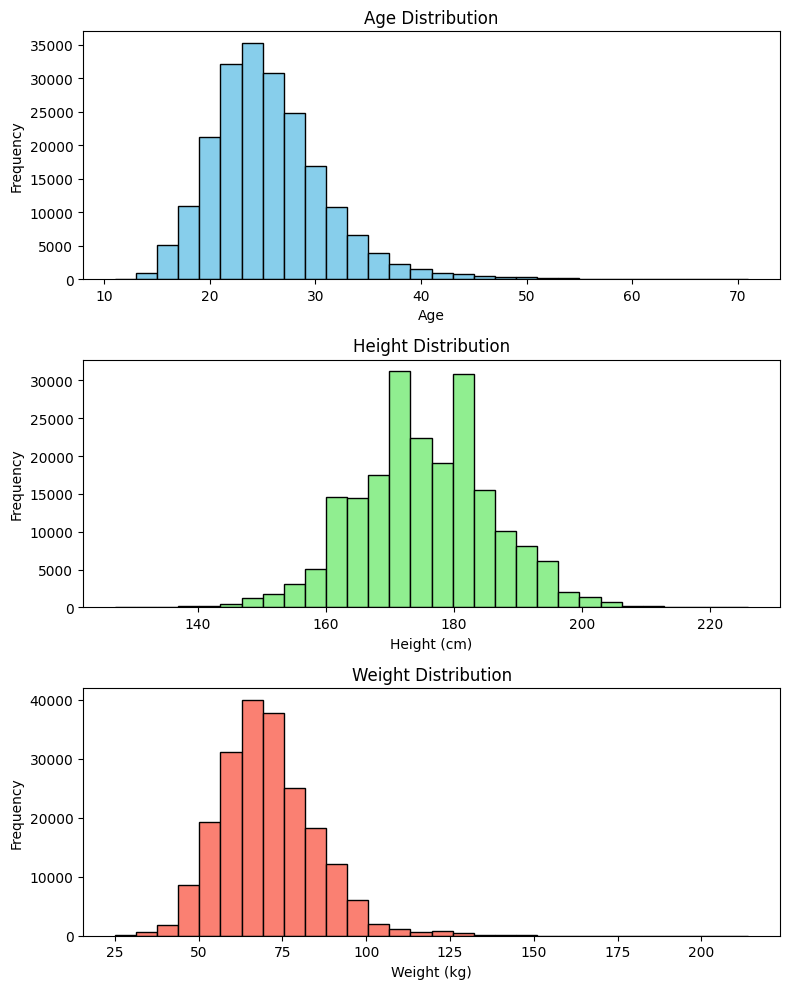

In [23]:
# Plot age, height and weight distributions
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Age distribution
axes[0].hist(athlete_events['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Height distribution
axes[1].hist(athlete_events['Height'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Frequency')

# Weight distribution
axes[2].hist(athlete_events['Weight'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Weight Distribution')
axes[2].set_xlabel('Weight (kg)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Machine Learning Models - Predicting Possible Olmpyic Game Winners and Break Out Athletes
We decided on using the Logisitic Regression Classifer, Decision Tree, and Random Forest machine learning models to predict the likelihood that athletes are winning medals.


Logistic Regression:
  Best Parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
  Best Score: 0.81
  Accuracy: 0.81
  F1 Score: 0.81
  Precision: 0.81
  Recall: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     33303
           1       0.00      0.00      0.00      7930

    accuracy                           0.81     41233
   macro avg       0.40      0.50      0.45     41233
weighted avg       0.65      0.81      0.72     41233



d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


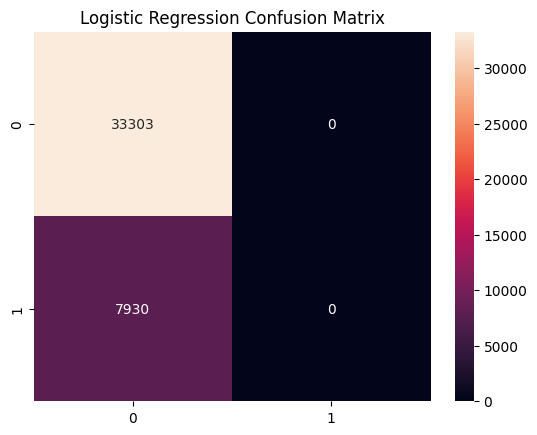

Decision Tree:
  Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5}
  Best Score: 0.81
  Accuracy: 0.81
  F1 Score: 0.81
  Precision: 0.81
  Recall: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     33303
           1       0.00      0.00      0.00      7930

    accuracy                           0.81     41233
   macro avg       0.40      0.50      0.45     41233
weighted avg       0.65      0.81      0.72     41233



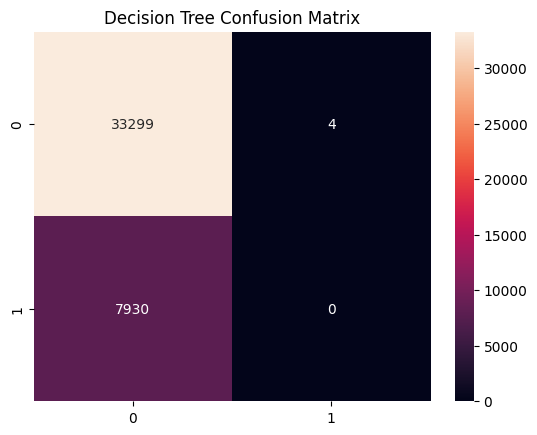


Best Model: Decision Tree
Best Model Accuracy: 0.81
Best Model F1 Score: 0.81


In [24]:
# Data for modeling
X = athlete_events[['Age', 'Height', 'Weight', 'Sex', 'Season']]
y = athlete_events['won_medal']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters for Logistic Regression
logisticRegression_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Hyperparameters for Decision Tree
decisisonTree_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2']
}

# Hyperparameters for Random Forest
# randomForest_params = {
#     'n_estimators': [10, 50, 100, 200, 500],
#     'max_depth': [3, 5, 7, 10],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['sqrt', 'log2']
# }

# Initialize models with GridSearchCV
models = {
    'Logistic Regression': GridSearchCV(LogisticRegression(), param_grid=logisticRegression_params, cv=5),
    'Decision Tree': GridSearchCV(DecisionTreeClassifier(), param_grid=decisisonTree_params, cv=5),
    # 'Random Forest': GridSearchCV(RandomForestClassifier(), param_grid=randomForest_params, cv=5)
}

# Model evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name}:")
    print(f"  Best Parameters: {model.best_params_}")
    print(f"  Best Score: {model.best_score_:.2f}")

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='micro')

    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
# Get the best model
best_model_name = max(models, key=lambda k: models[k].best_score_)
best_model = models[best_model_name].best_estimator_

# Evaluate the best model
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='micro')

print(f"\nBest Model: {best_model_name}")
print(f"Best Model Accuracy: {accuracy_best:.2f}")
print(f"Best Model F1 Score: {f1_best:.2f}")

In [7]:
# Feature selection
features = ['Age', 'Height', 'Weight', 'Sex', 'Season']
X = athlete_events[features]
y = athlete_events['won_medal']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model for predicting medal wins
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)

print("Classification Report for Medal Wins Prediction:")
print(classification_report(y_test, y_pred))

# Identifying breakout candidates
# Filter athletes who have participated before but haven't won a medal
breakout_candidates = athlete_events[(athlete_events['breakout_candidate'] == 1)]

X_breakout = breakout_candidates[features]
y_breakout = breakout_candidates['won_medal']

# Predicting breakout candidates
# Assuming model trained on the entire dataset for simplicity
X_breakout_scaled = scaler.transform(X_breakout)
breakout_predictions = rf_clf.predict(X_breakout_scaled)

print("\nPotential Breakout Athletes in the Upcoming Olympics:")
breakout_candidates['breakout_prediction'] = breakout_predictions
print(breakout_candidates[breakout_candidates['breakout_prediction'] == 1][['Name', 'Sport', 'Team']].drop_duplicates())


Classification Report for Medal Wins Prediction:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     46290
           1       0.27      0.08      0.12      7934

    accuracy                           0.83     54224
   macro avg       0.57      0.52      0.52     54224
weighted avg       0.77      0.83      0.79     54224


Potential Breakout Athletes in the Upcoming Olympics:
                                        Name       Sport  \
125                               Hans Aasns    Shooting   
133                     Erling Rudolf Aastad   Athletics   
288     Mohamed Ibrahim Abd El-Fatah Mohamed   Wrestling   
472                                 Ali Abdo   Wrestling   
1107          Kanat Kalizhanovich Abutalipov      Boxing   
...                                      ...         ...   
270169                         Boris Zlokovi  Water Polo   
270367                           Dragan Zori    Canoeing   
270390                       

C:\Users\joeyt\AppData\Local\Temp\ipykernel_23540\1588002715.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakout_candidates['breakout_prediction'] = breakout_predictions


Logistic Regression F1 Score: 0.4605
Random Forest F1 Score: 0.5078
Decision Tree F1 Score: 0.5087

Best Model: Decision Tree with F1 Score: 0.5087


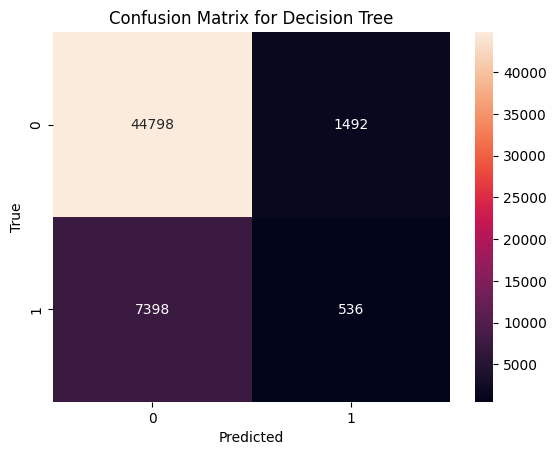

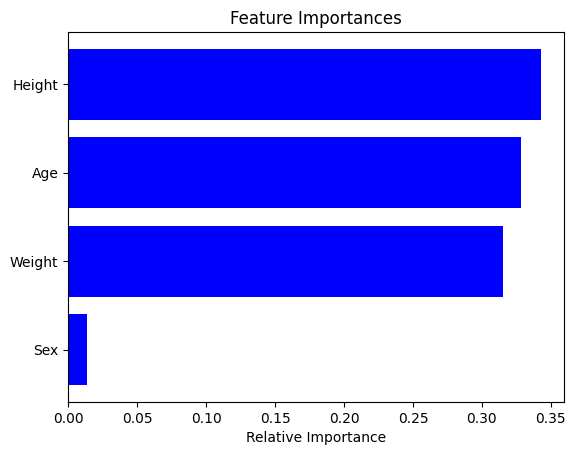

In [8]:

athlete_events = pd.read_csv('athlete_events.csv')

# Convert medals to binary 'won_medal' feature
athlete_events['won_medal'] = athlete_events['Medal'].notnull().astype(int)
athlete_events.fillna({'Age': athlete_events['Age'].median(), 'Height': athlete_events['Height'].median(), 'Weight': athlete_events['Weight'].median()}, inplace=True)
athlete_events['Sex'] = athlete_events['Sex'].map({'F': 1, 'M': 0}).astype(int)
features = ['Age', 'Height', 'Weight', 'Sex']
X = athlete_events[features]
y = athlete_events['won_medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier()}

# Train and evaluate models
best_f1 = 0
best_model = None
best_name = ''
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} F1 Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_name = name

print(f"\nBest Model: {best_name} with F1 Score: {best_f1:.4f}")

# Confusion Matrix for the best model
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix for {best_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importances
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


Classification Report for Medal Wins Prediction:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     46290
           1       0.28      0.08      0.13      7934

    accuracy                           0.84     54224
   macro avg       0.57      0.52      0.52     54224
weighted avg       0.78      0.84      0.79     54224



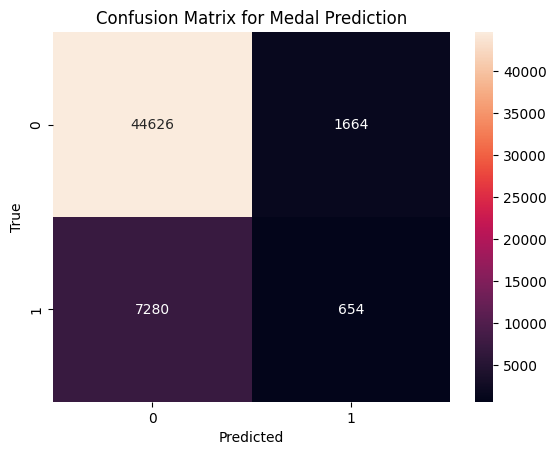

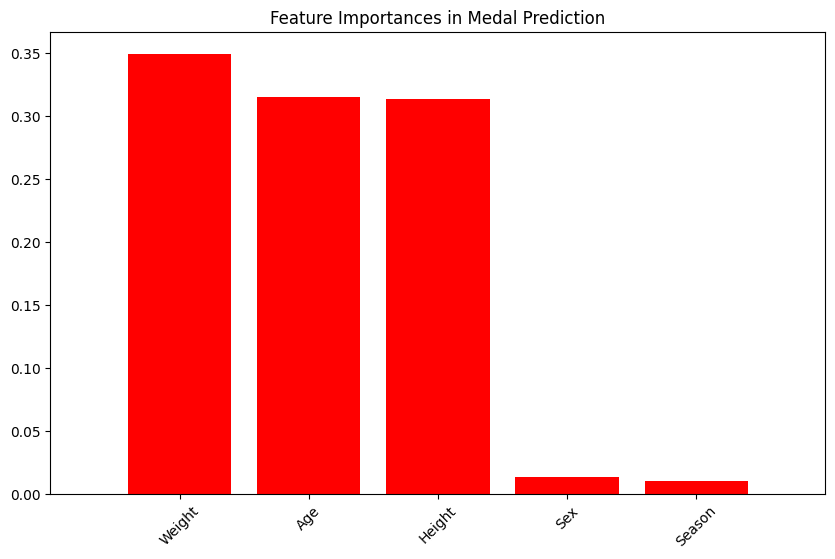


Top 5 Potential Breakout Athletes in the Upcoming Olympics:
                                Name       Sport           Team  \
13131          Eugenio Balanqu Llpiz   Athletics           Cuba   
107728  Grit Jensen-Naumann (-Bhnke)  Volleyball   East Germany   
165314       Peter Robert Mulkerrins      Rowing  Great Britain   
95410     Margarete "Grete" Heublein   Athletics        Germany   
95409     Margarete "Grete" Heublein   Athletics        Germany   

        breakout_prediction_proba  
13131                    0.990000  
107728                   0.990000  
165314                   0.980000  
95410                    0.976667  
95409                    0.976667  


C:\Users\joeyt\AppData\Local\Temp\ipykernel_5572\1252377058.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakout_candidates['breakout_prediction_proba'] = rf_clf.predict_proba(X_breakout_scaled)[:, 1]


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection
features = ['Age', 'Height', 'Weight', 'Sex', 'Season']
X = athlete_events[features]
y = athlete_events['won_medal']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model for predicting medal wins
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)

# Classification Report and Confusion Matrix for Medal Wins Prediction
print("Classification Report for Medal Wins Prediction:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix for Medal Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Medal Prediction')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicting breakout candidates
breakout_candidates = athlete_events[athlete_events['breakout_candidate'] == 1]
X_breakout = breakout_candidates[features]
X_breakout_scaled = scaler.transform(X_breakout)
breakout_candidates['breakout_prediction_proba'] = rf_clf.predict_proba(X_breakout_scaled)[:, 1]

# Selecting top 5 prospects
top_5_prospects = breakout_candidates.sort_values(by='breakout_prediction_proba', ascending=False).head(5)
print("\nTop 5 Potential Breakout Athletes in the Upcoming Olympics:")
print(top_5_prospects[['Name', 'Sport', 'Team', 'breakout_prediction_proba']])
